# Chaining

In [17]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

SAMPLE_SIZE = 100
ARRIVAL_RATE = 1
EXECUTION_RATE = 100

## 100 requests arrive at the same time

In [18]:
inter_arrival_time = np.zeros(shape=SAMPLE_SIZE, dtype=int)

## Queue length over time

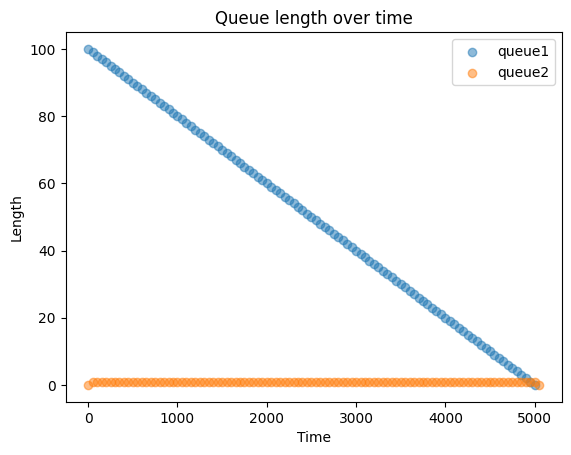

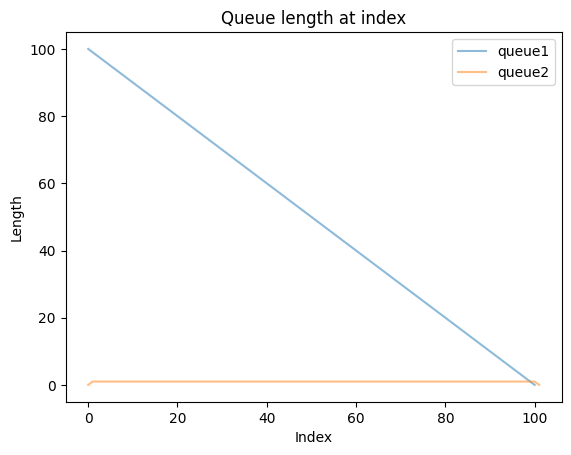

Mean queue1 length: 50.0
Mean queue2 length: 0.9803921568627451


In [19]:
from src.queue import Queue, timestamps_to_intervals

execution_time = np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=50)
queue1 = Queue(inter_arrival_time, execution_time, executors=1)
queue1.process()

inter_departure_times = timestamps_to_intervals(queue1.departure_times)
queue2 = Queue(inter_departure_times, execution_time, executors=1)
queue2.process()

plt.title("Queue length over time")
plt.xlabel("Time")
plt.ylabel("Length")
plt.scatter(*zip(*queue1.length_with_timestamps), alpha=0.5, label="queue1")
plt.scatter(*zip(*queue2.length_with_timestamps), alpha=0.5, label="queue2")
plt.legend()
plt.show()

plt.title("Queue length at index")
plt.xlabel("Index")
plt.ylabel("Length")
plt.plot(queue1.length, alpha=0.5, label="queue1")
plt.plot(queue2.length, alpha=0.5, label="queue2")
plt.legend()
plt.show()

print(f'Mean queue1 length: {queue1.length.mean()}')
print(f'Mean queue2 length: {queue2.length.mean()}')


## Departure time and distribution

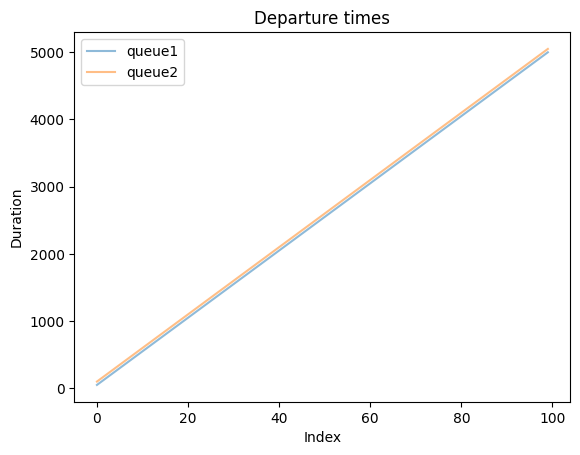

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


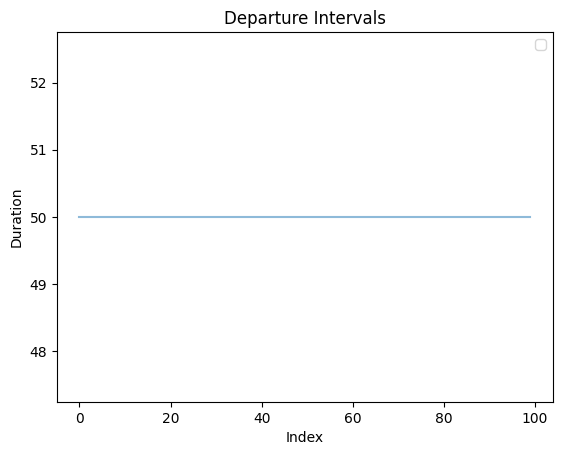

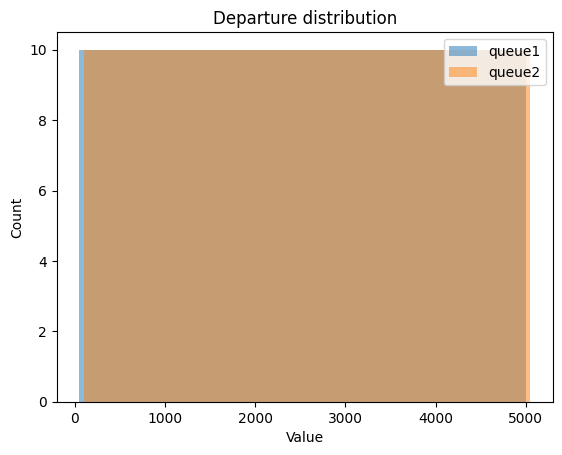

Total time required for queue1: 5000ms
Total time required overall: 5050ms


In [20]:
from src.queue import timestamps_to_intervals

plt.title("Departure times")
plt.xlabel("Index")
plt.ylabel("Duration")
plt.plot(queue1.departure_times, alpha=0.5, label="queue1")
plt.plot(queue2.departure_times, alpha=0.5, label="queue2")
plt.legend()
plt.show()

plt.title("Departure Intervals")
plt.xlabel("Index")
plt.ylabel("Duration")
plt.plot(inter_departure_times, alpha=0.5)
plt.legend()
plt.show()

plt.title("Departure distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue1.departure_times, alpha=0.5, label="queue1")
plt.hist(queue2.departure_times, alpha=0.5, label="queue2")
plt.legend()
plt.show()

print(f'Total time required for queue1: {queue1.departure_times[-1]}ms')
print(f'Total time required overall: {queue2.departure_times[-1]}ms')

## Wait time and distribution

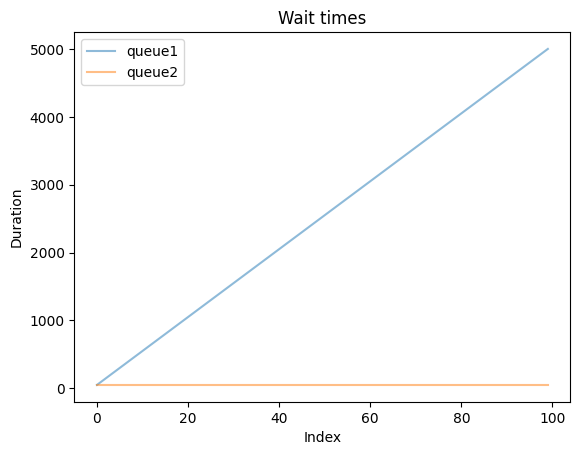

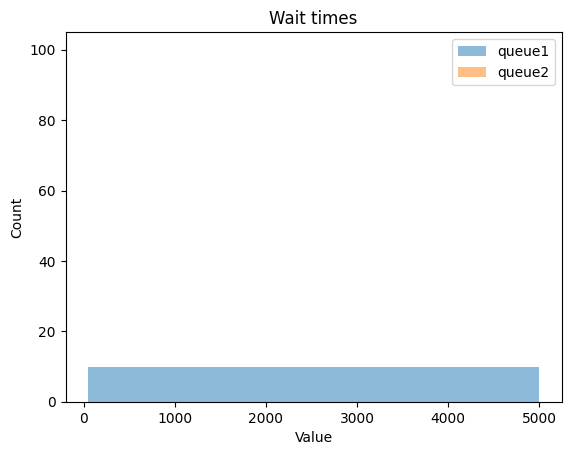

In [21]:
plt.title("Wait times")
plt.xlabel("Index")
plt.ylabel("Duration")
plt.plot(queue1.wait_times, alpha=0.5, label="queue1")
plt.plot(queue2.wait_times, alpha=0.5, label="queue2")
plt.legend()
plt.show()

plt.title("Wait times")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue1.wait_times, alpha=0.5, label="queue1")
plt.hist(queue2.wait_times, alpha=0.5, label="queue2")
plt.legend()
plt.show()

# Utilization

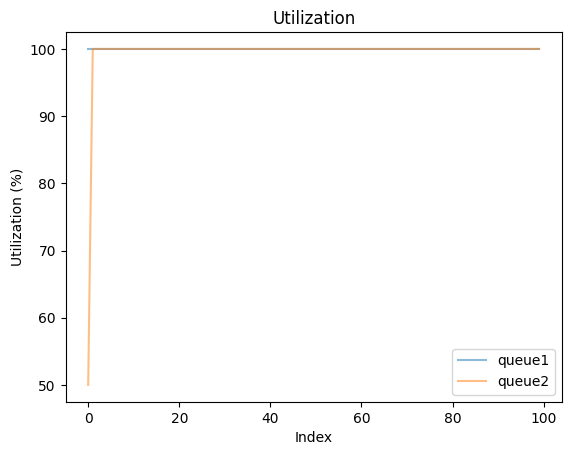

In [22]:
plt.title("Utilization")
plt.xlabel("Index")
plt.ylabel("Utilization (%)")
# plot lines 
plt.plot(queue1.utilization() * 100, label = "queue1", alpha=0.5) 
plt.plot(queue2.utilization() * 100, label = "queue2", alpha=0.5) 
plt.legend() 
plt.show()